# Machine Learning Assignment 1

**DT228B/1**

**Group Assignment - 2019**

***

| **Name** | **Student Number** |
| :--- | --- |
| Clayton Barrozo | D17123635 |
| Luis Perez | D16128800 |

***

## Initializations
### Preparing Libraries

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from hyperopt import hp, tpe, Trials, STATUS_OK, fmin
from sklearn import preprocessing
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import precision_score, roc_auc_score, accuracy_score, confusion_matrix, pairwise_distances_argmin_min
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

### Loading Dataset

In [2]:
train_ds = pd.read_csv("./data/train.csv")

In [3]:
train_ds.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Exploratory Data Analysis
### Dataset Details

In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


The dataset contains 200,000 instances and 200 numeric (continuous/ ratio) features. Additional features have been included to identify instance by a label and to specify the target class of each instance.

### Missing Values

Identify number of missing values in the dataset.

In [5]:
print('Missing Values Count (Train) = ', str(train_ds.isna().values.sum()))

Missing Values Count (Train) =  0


The dataset contains no missing values.

### Feature Distributions

In [6]:
train_ds.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
# Dividing features in 4 groups of 50 to facilitate their visualization
train_ds_features = train_ds.iloc[:, 2:]
train_ds_feat_1 = train_ds.iloc[:, 2:52]
train_ds_feat_50 = train_ds.iloc[:, 52:102]
train_ds_feat_100 = train_ds.iloc[:, 102:152]
train_ds_feat_150 = train_ds.iloc[:, 152:]

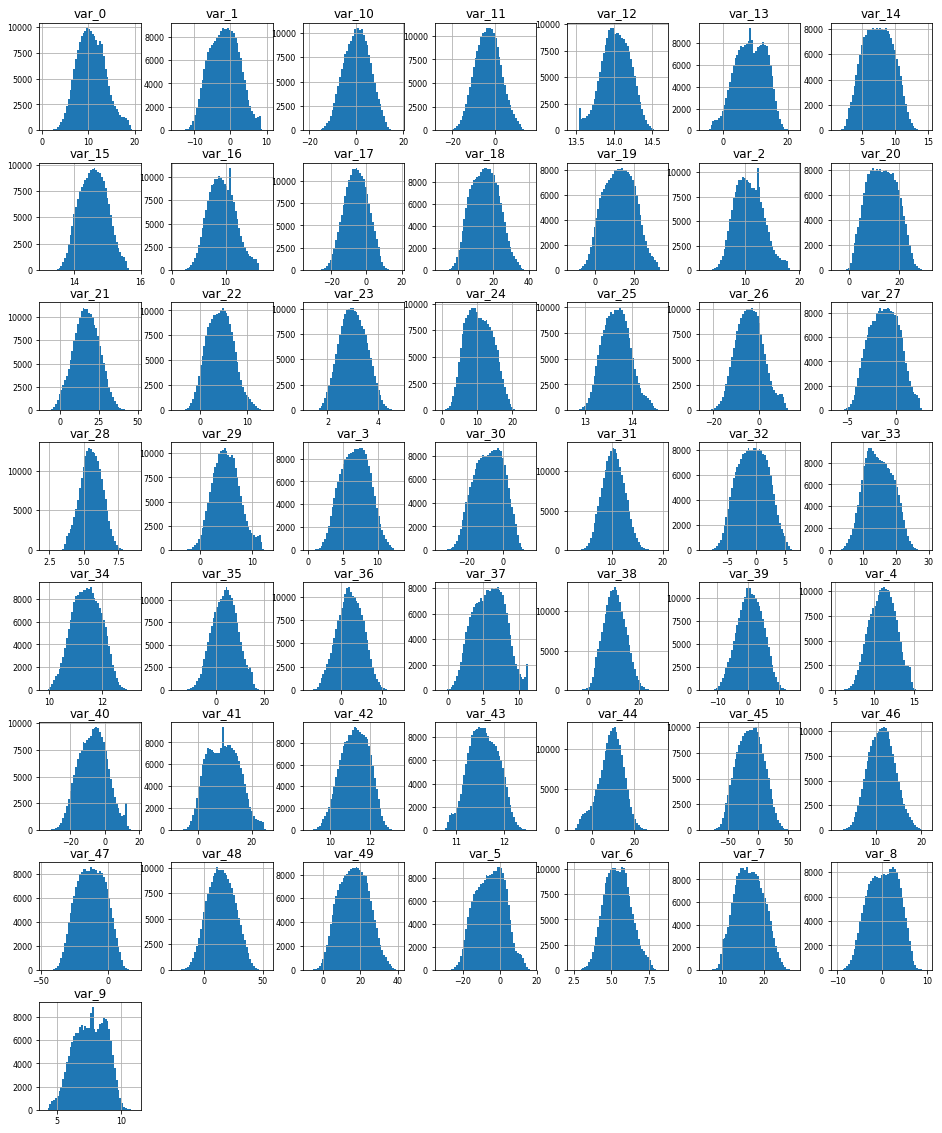

In [8]:
train_ds_feat_1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

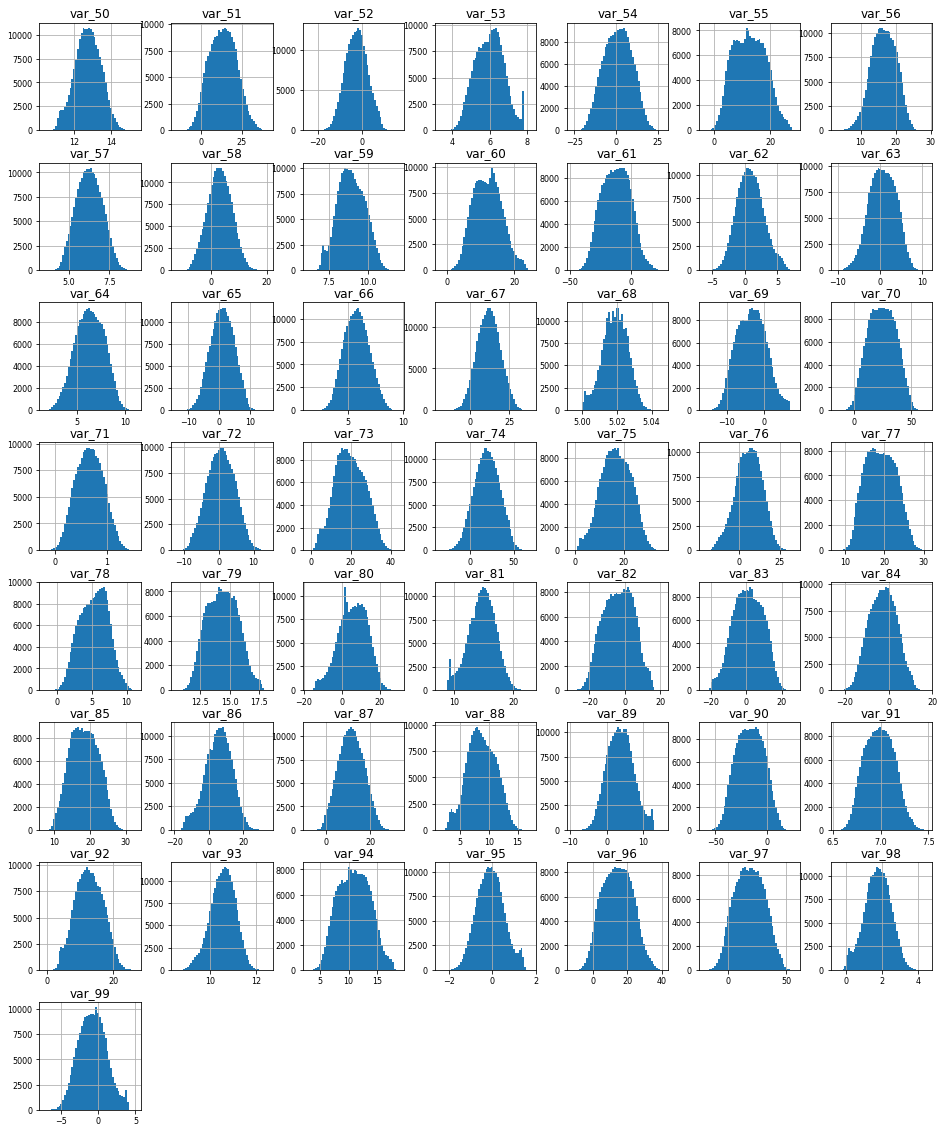

In [9]:
train_ds_feat_50.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

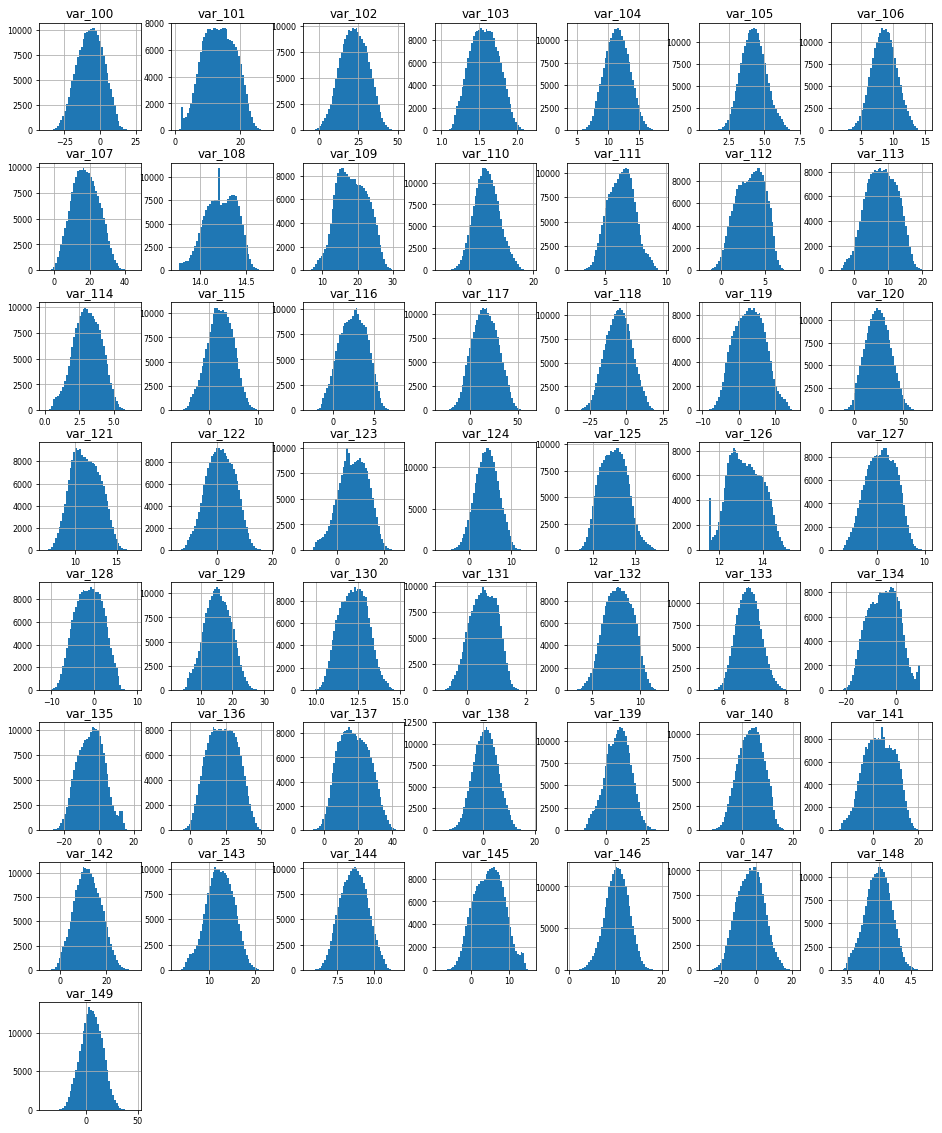

In [10]:
train_ds_feat_100.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

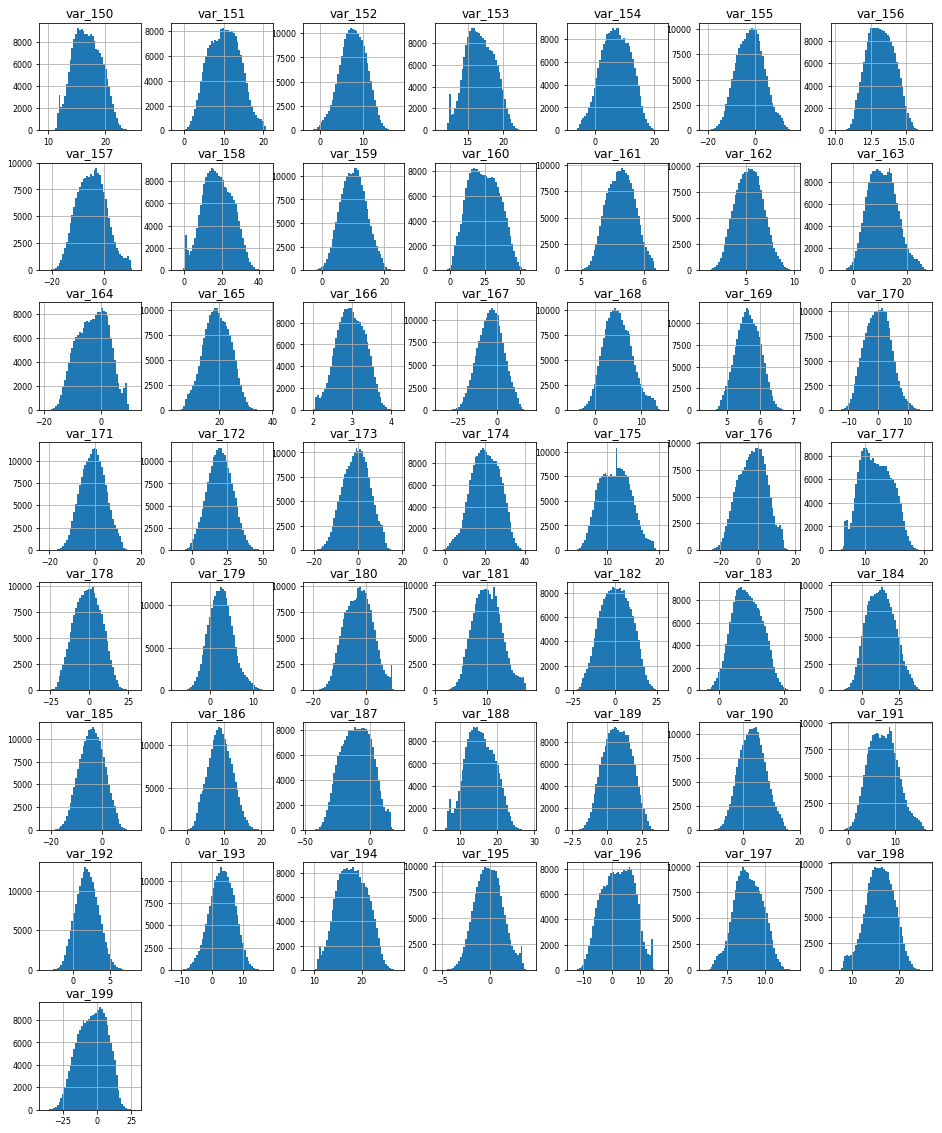

In [11]:
train_ds_feat_150.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

The histograms above show the different distributions of the features in the training dataset. It is hard to identify what each feature might refer to in the context of a banking institution as Santander. Features are mostly bell-shaped but they often have tail bumps and flat, irregular, or pointy centers.

Scaling features to facilitate calculations and avoid over-representation of features. Using Min-Max scaler as features do not follow normal distributions.

In [12]:
for i in train_ds.columns[2:]: 
  train_ds[i] = preprocessing.minmax_scale(train_ds[i].astype('float64'))

In [13]:
train_ds.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,0.515985,0.527761,0.498848,0.516818,0.517698,0.551997,0.501877,0.501123,0.522330,...,0.532601,0.521950,0.470032,0.502746,0.483477,0.536917,0.507605,0.488022,0.483899,0.527460
std,0.300653,0.152716,0.159324,0.153221,0.154463,0.139968,0.157852,0.142057,0.152988,0.161333,...,0.140158,0.155773,0.121015,0.132779,0.162998,0.149925,0.167666,0.152592,0.152223,0.154974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.404160,0.405322,0.383234,0.400217,0.414637,0.428839,0.396761,0.384659,0.396368,...,0.431376,0.404422,0.385063,0.411373,0.360573,0.429027,0.376952,0.379516,0.380712,0.410436
50%,0.000000,0.508191,0.528530,0.491004,0.518970,0.520277,0.556658,0.497967,0.497138,0.527633,...,0.531653,0.517279,0.467860,0.504894,0.481614,0.533706,0.510850,0.484718,0.487100,0.534987
75%,0.000000,0.620387,0.645236,0.603369,0.632294,0.619692,0.672246,0.599256,0.615573,0.650798,...,0.630091,0.628818,0.553659,0.598340,0.608396,0.638836,0.638353,0.601460,0.594820,0.648661
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Analysis

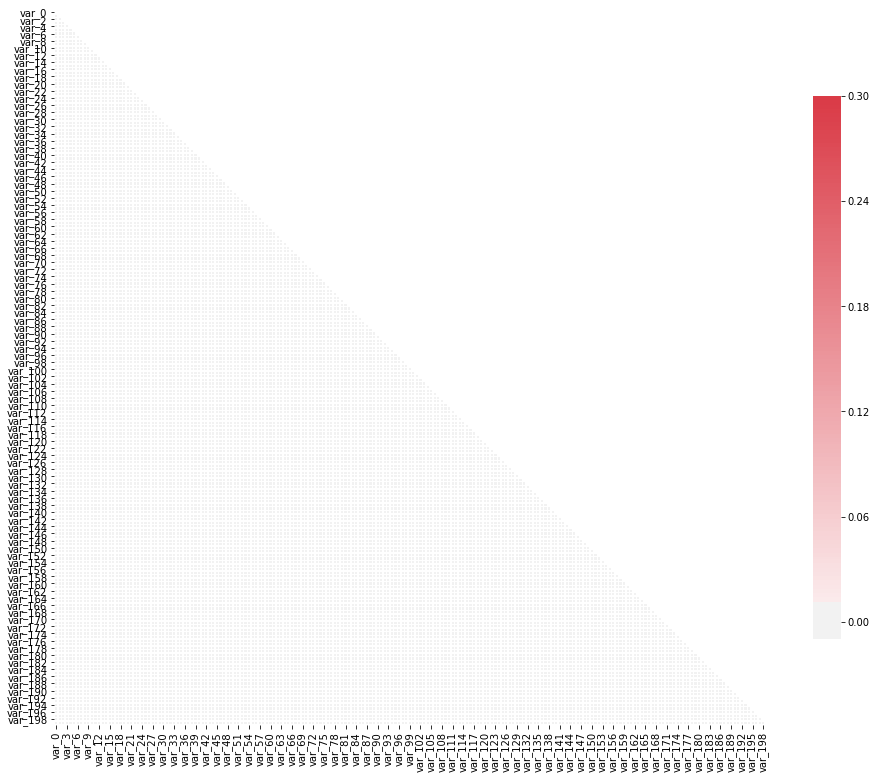

In [14]:
# Compute the correlation matrix
corr = train_ds_features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The figure above shows there is little or none correlation between the features. Hence, all might be contributing to the classification problem.

### Imbalance Analysis

Identify number of instances per class.

In [15]:
train_ds_class_count = train_ds.loc[:, 'ID_code' : 'target'].groupby(by = ['target'], squeeze = True).count()
train_ds_class_count

,ID_code
target,
0,179902
1,20098


The dataset presents a great class imbalance problem: 90% of instances belong to class 0 (no transaction), while 10% belong to class 1 (transaction).

## Classification Problem

In [16]:
# Divide train dataset by classes
train_ds_0 = train_ds.query('target == 0')
train_ds_1 = train_ds.query('target == 1')

# Divide classification label and data for all train datasets
train_ds_target = train_ds.loc[:, 'target']
train_ds_data   = train_ds.loc[:, ~train_ds.columns.isin(['ID_code', 'target'])]

train_ds_0_target = train_ds_0.loc[:, 'target']
train_ds_0_data   = train_ds_0.loc[:, ~train_ds.columns.isin(['ID_code', 'target'])]

train_ds_1_target = train_ds_1.loc[:, 'target']
train_ds_1_data   = train_ds_1.loc[:, ~train_ds.columns.isin(['ID_code', 'target'])]

### Under-sampling Majority Class

Using MiniBatch K-Means clustering algorithm to identify **20,098** clusters. K-Means was attempted but process was taking too long to process. This might have been due to the sum of the following:

1. Memory or CPU power limitations of the environment.
2. High number of instances in the dataset.
3. High number of clusters to find (20,098).
4. High number of features per instance (to calculate similarity measure).

MinBatch K-Means offered better performance at the expense of accuracy.

In [17]:
mb_k_means = MiniBatchKMeans(init='k-means++', n_clusters=train_ds_class_count.iloc[1, 0], verbose = True, 
    batch_size=train_ds_class_count.iloc[1, 0])
t0 = time.time()

In [18]:
%%time
mb_k_means.fit(train_ds_0_data)
print('Execution Time (ms) = ', str(time.time() - t0))

Init 1/3 with method: k-means++
Inertia for init 1/3: 193106.702155
Init 2/3 with method: k-means++
Inertia for init 2/3: 192405.163260
Init 3/3 with method: k-means++
Inertia for init 3/3: 193585.523221
Minibatch iteration 1/900: mean batch inertia: 3.672622, ewa inertia: 3.672622 
Minibatch iteration 2/900: mean batch inertia: 3.655800, ewa inertia: 3.668863 
Minibatch iteration 3/900: mean batch inertia: 3.665758, ewa inertia: 3.668170 
Minibatch iteration 4/900: mean batch inertia: 3.652967, ewa inertia: 3.664773 
Minibatch iteration 5/900: mean batch inertia: 3.643649, ewa inertia: 3.660053 
Minibatch iteration 6/900: mean batch inertia: 3.632660, ewa inertia: 3.653933 
Minibatch iteration 7/900: mean batch inertia: 3.653241, ewa inertia: 3.653778 
Minibatch iteration 8/900: mean batch inertia: 3.631083, ewa inertia: 3.648707 
Minibatch iteration 9/900: mean batch inertia: 3.637456, ewa inertia: 3.646193 
[MiniBatchKMeans] Reassigning 10049 cluster centers.
Minibatch iteration 10/

In [19]:
print('Number of Clusters (Centroids) = ', len(mb_k_means.cluster_centers_))
print('Number of Features per Centroid = ', len(mb_k_means.cluster_centers_[1]))

Number of Clusters (Centroids) =  20098
Number of Features per Centroid =  200


In [20]:
# Extract cluster centroids as instances for majority class
train_ds_0_cluster_centroids = mb_k_means.cluster_centers_

### Approach 1: Synthetic Instances - Cluster Centroids
Create training dataset using cluster centroids as undersampled instances of majority class, and all instances of minority class.

In [21]:
train_ds_0_data_usampled = pd.DataFrame(data = train_ds_0_cluster_centroids, columns = train_ds.columns[2:])
train_ds_0_data_usampled.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,...,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000
mean,0.514548,0.525119,0.498568,0.515514,0.518554,0.551173,0.499897,0.500812,0.520771,0.502998,...,0.530593,0.518729,0.473075,0.502505,0.485109,0.534772,0.506645,0.490943,0.485868,0.524909
std,0.136037,0.142928,0.137625,0.139773,0.125063,0.141729,0.126635,0.137909,0.145054,0.156003,...,0.123698,0.139890,0.107950,0.119073,0.145781,0.135525,0.152021,0.136673,0.134765,0.140276
min,0.052068,0.048945,0.054462,0.022315,0.065493,0.103942,0.090240,0.101486,0.046367,0.037994,...,0.051152,0.046542,0.058640,0.064753,0.087162,0.038337,0.021555,0.054108,0.017467,0.037864
25%,0.423702,0.424754,0.404594,0.419720,0.437309,0.452655,0.415899,0.403512,0.418027,0.391993,...,0.451566,0.422871,0.404817,0.428839,0.384630,0.446355,0.399293,0.401291,0.401549,0.429842
50%,0.508477,0.524791,0.491065,0.515793,0.519325,0.554561,0.495423,0.497254,0.525044,0.508997,...,0.530525,0.515115,0.472208,0.504442,0.483404,0.531697,0.508553,0.488710,0.489202,0.529562
75%,0.599290,0.622089,0.588227,0.610158,0.601741,0.650353,0.579446,0.595313,0.626457,0.620591,...,0.609638,0.607693,0.540803,0.580226,0.586547,0.619585,0.616133,0.582995,0.574915,0.626215
max,0.987893,0.923053,0.940421,0.975984,0.923883,0.990667,0.924349,0.948850,0.986910,0.930739,...,0.957030,0.970786,0.898133,1.000000,0.926538,0.979305,0.940377,0.977764,0.997750,0.979741


In [22]:
# Join majority and minority classes. Resulting dataset is balanced (20098 on class 0 and 20098 on class 1)
X_train_ds = pd.concat([train_ds_0_data_usampled, train_ds_1_data])
X_train_ds.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,...,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000
mean,0.527235,0.538438,0.511514,0.518721,0.520411,0.558900,0.515068,0.500275,0.526277,0.490950,...,0.543333,0.531318,0.463795,0.499108,0.478724,0.542188,0.513046,0.481425,0.472815,0.532081
std,0.151353,0.155482,0.152390,0.148431,0.133928,0.153149,0.140286,0.145721,0.153695,0.167843,...,0.136980,0.153710,0.115219,0.127484,0.156353,0.146234,0.161818,0.147873,0.150777,0.147963
min,0.002230,0.039591,0.048103,0.022315,0.065493,0.086652,0.024375,0.087400,0.032261,0.030027,...,0.051152,0.017967,0.040665,0.000000,0.074154,0.025436,0.005816,0.026226,0.013114,0.000000
25%,0.420263,0.425514,0.400873,0.412532,0.427675,0.446895,0.415690,0.392986,0.412420,0.369765,...,0.449731,0.420290,0.385468,0.415617,0.366951,0.440858,0.395123,0.383087,0.376594,0.427038
50%,0.517916,0.536969,0.503002,0.519560,0.521302,0.561683,0.510262,0.496359,0.530461,0.500543,...,0.540926,0.525783,0.461936,0.501661,0.477873,0.537461,0.515218,0.480215,0.477621,0.537186
75%,0.625211,0.645971,0.608799,0.622927,0.613351,0.668701,0.606128,0.604101,0.642560,0.621309,...,0.634663,0.629686,0.539341,0.586592,0.591906,0.636961,0.633867,0.585781,0.577435,0.643983
max,0.987893,0.947011,0.940421,0.975984,0.923883,0.990667,0.973362,0.970817,0.986910,0.930739,...,0.957030,0.989901,0.938217,1.000000,0.967064,0.980617,0.964339,0.977764,0.997750,0.979741


### Approach 2: Real Instances - Cluster Centroids Nearest Neighbors
Create training dataset using the nearest neighbor of cluster centroids as undersampled instances of majority class, and all instances of minority class.

In [23]:
closest, _ = pairwise_distances_argmin_min(train_ds_0_cluster_centroids, train_ds_0_data)
closest

array([ 30157, 130538,  23772, ..., 143135, 153803,  61460], dtype=int64)

In [24]:
train_ds_0_data_usampled_2 = train_ds_0_data.iloc[closest]
train_ds_0_data_usampled_2.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,...,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000,20098.000000
mean,0.514274,0.524793,0.497531,0.515067,0.518378,0.551465,0.499745,0.500908,0.520294,0.503185,...,0.530795,0.519005,0.473218,0.502907,0.484777,0.534862,0.507146,0.490911,0.486196,0.524771
std,0.150162,0.157487,0.151718,0.154052,0.138855,0.156046,0.140414,0.152139,0.160771,0.171348,...,0.137019,0.154252,0.120336,0.132004,0.160286,0.149488,0.167416,0.151317,0.148256,0.154671
min,0.052068,0.048945,0.054462,0.022315,0.065493,0.103942,0.090240,0.068897,0.046367,0.037994,...,0.051152,0.046542,0.033053,0.064753,0.087162,0.038337,0.021555,0.054108,0.017467,0.037864
25%,0.404989,0.402897,0.383416,0.399441,0.417398,0.430059,0.398593,0.384786,0.394517,0.370747,...,0.432775,0.403693,0.388947,0.412123,0.363700,0.427060,0.377968,0.383990,0.385424,0.409174
50%,0.507231,0.525366,0.489217,0.515882,0.520549,0.556546,0.494148,0.495578,0.526505,0.510223,...,0.531312,0.515019,0.471920,0.504417,0.482323,0.530795,0.510121,0.487094,0.489421,0.531698
75%,0.617199,0.641430,0.601740,0.628896,0.619225,0.670303,0.596317,0.615807,0.647714,0.645548,...,0.627554,0.624503,0.557316,0.597960,0.607809,0.635721,0.638701,0.602172,0.591367,0.646313
max,0.987893,0.928757,0.941674,0.975984,0.923883,0.990667,0.997590,0.948850,0.986910,0.933761,...,0.999720,0.970786,0.898133,1.000000,0.936478,0.979305,0.940377,0.977764,0.997750,0.979741


In [25]:
# Join majority and minority classes. Resulting dataset is balanced (20098 on class 0 and 20098 on class 1)
X_train_ds_2 = pd.concat([train_ds_0_data_usampled_2, train_ds_1_data])
X_train_ds_2.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,...,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000
mean,0.527098,0.538275,0.510995,0.518497,0.520323,0.559046,0.514992,0.500323,0.526039,0.491044,...,0.543433,0.531456,0.463866,0.499309,0.478558,0.542233,0.513296,0.481408,0.472978,0.532012
std,0.157900,0.162376,0.158981,0.155341,0.140559,0.159950,0.146704,0.152637,0.161332,0.175171,...,0.143169,0.160423,0.121205,0.133704,0.163291,0.152884,0.169235,0.154838,0.156994,0.154974
min,0.002230,0.039591,0.048103,0.022315,0.065493,0.086652,0.024375,0.068897,0.032261,0.030027,...,0.051152,0.017967,0.033053,0.000000,0.074154,0.025436,0.005816,0.026226,0.013114,0.000000
25%,0.410540,0.413574,0.389771,0.402175,0.417241,0.435007,0.406555,0.383120,0.401025,0.359090,...,0.440038,0.410300,0.378046,0.407809,0.356463,0.431518,0.383267,0.374069,0.368442,0.416821
50%,0.518645,0.539128,0.503762,0.520256,0.522218,0.564284,0.512417,0.495412,0.531927,0.500216,...,0.543144,0.527396,0.460023,0.501069,0.476448,0.538127,0.517180,0.478253,0.475887,0.539394
75%,0.632882,0.655894,0.616946,0.632823,0.622458,0.678287,0.615079,0.614366,0.653587,0.634354,...,0.643302,0.638856,0.548003,0.595887,0.603373,0.645612,0.644494,0.596183,0.586487,0.653656
max,0.987893,0.947011,0.941674,0.975984,0.923883,0.990667,0.997590,0.970817,0.986910,0.933761,...,0.999720,0.989901,0.938217,1.000000,0.967064,0.980617,0.964339,0.977764,0.997750,0.979741


### Prepare Models

In [26]:
# Create arrays of 20098 instances of majority and minority classes
aux_ar_0 = np.zeros(shape = (train_ds_class_count.iloc[1, 0], 1), dtype = np.int64)
aux_ar_1 = np.full((train_ds_class_count.iloc[1, 0], 1), 1)
aux_ar = np.concatenate((aux_ar_0, aux_ar_1))
aux_ds = pd.DataFrame(data = aux_ar, columns = ['target'])

In [27]:
aux_ds.query('target == 1').count()
y_train_ds = aux_ds

In [80]:
%%time
# Model 1: Decision tree balanced 1 (Approach 1)

tree_balanced = DecisionTreeClassifier(criterion="entropy")
tree_balanced_scores = cross_val_score(tree_balanced, X_train_ds, y_train_ds, cv=10, verbose = 10, scoring='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ....................... , score=0.7166666666666666, total=  31.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.1s remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6619402985074627, total=  29.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6532338308457712, total=  29.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6435323383084577, total=  30.5s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.0min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6549751243781095, total=  29.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6552238805970149, total=  29.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.0min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6358208955223881, total=  28.3s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.5min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6412935323383084, total=  30.6s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.0min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6329019412643105, total=  30.7s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.5min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6122448979591837, total=  29.7s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.0min finished


Wall time: 5min


In [81]:
%%time
# Model 2: Decision tree balanced 2 (Approach 2)

tree_balanced_2 = DecisionTreeClassifier(criterion="entropy")
tree_balanced_scores_2 = cross_val_score(tree_balanced_2, X_train_ds_2, y_train_ds, cv=10, verbose = 10, scoring='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ....................... , score=0.6211442786069652, total=  32.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.0s remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6144278606965173, total=  32.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6208955223880598, total=  31.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6136815920398009, total=  31.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.1min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6124378109452736, total=  32.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.7min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6146766169154227, total=  32.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.2min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.5917910447761194, total=  31.7s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.7min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6151741293532339, total=  33.6s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.3min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6127426580388253, total=  31.6s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.8min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.6052762568442012, total=  31.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.3min finished


Wall time: 5min 20s


In [82]:
%%time
# Model 3: Decision tree imbalanced

tree_imbalanced = DecisionTreeClassifier(criterion="entropy")
tree_imbalanced_scores = cross_val_score(tree_imbalanced, train_ds_data, train_ds_target, cv=10, verbose = 10, scoring='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ....................... , score=0.5489768101297746, total= 3.8min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.8min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.5541783744276781, total= 3.6min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.4min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.5494426146090006, total= 3.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.0min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.5557782239442034, total= 3.7min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 14.7min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.5493704352058496, total= 3.6min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 18.3min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.5532448928232655, total= 3.5min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 21.8min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.5498011609545381, total= 3.7min


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 25.5min remaining:    0.0s


[CV]  ................................................................
[CV] ......................... , score=0.54746376510997, total= 3.7min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 29.3min remaining:    0.0s


[CV]  ................................................................
[CV] ........................ , score=0.557594424312384, total= 3.8min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 33.1min remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=0.5545295198842561, total= 4.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 37.0min finished


Wall time: 37min 1s


In [83]:
print('Balanced Decision Tree Approach 1 Score = ', np.mean(tree_balanced_scores))

Balanced Decision Tree Approach 1 Score =  0.6507833406387673


In [84]:
print('Balanced Decision Tree Approach 2 Score = ', np.mean(tree_balanced_scores_2))

Balanced Decision Tree Approach 2 Score =  0.6122247770604419


In [85]:
print('Imbalanced Decision Tree Score = ', np.mean(tree_imbalanced_scores))

Imbalanced Decision Tree Score =  0.5520380221400921


The initial comparison between the models show that both balanced data approaches perform better than imbalanced data model. Additionally, approach 1 model had the best performance of all three. This is a slightly different result from that obtained by the researchers in the reference paper, were usually approach 2 achieved better results.

### Evaluation Against Kernel

Finally, we will execute the same evaluation approach and classifier used by the reference Kernel. The following code has been extracted from the Kernel and the credit belongs to __[Comparing Resamplig Techniques and XGBoost v.14](https://www.kaggle.com/nholloway/comparing-resampling-techniques-and-xgboost)__. We wanted to repeat their steps to compare results as close as possible. Therefore, same code and same parameters have been used.

In [54]:

# Organizes XGB results and extracts metadata from Trials object
def org_results(trials, hyperparams, ratio, model_name):
    fit_idx = -1
    for idx, fit  in enumerate(trials):
        hyp = fit['misc']['vals']
        xgb_hyp = {key:[val] for key, val in hyperparams.items()}
        if hyp == xgb_hyp:
            fit_idx = idx
            break
            
    train_time = str(trials[-1]['refresh_time'] - trials[0]['book_time'])
    acc = round(trials[fit_idx]['result']['accuracy'], 3)
    train_auc = round(trials[fit_idx]['result']['train auc'], 3)
    test_auc = round(trials[fit_idx]['result']['test auc'], 3)
    conf_matrix = trials[fit_idx]['result']['conf matrix']

    results = {
        'model': model_name,
        'ratio': ratio,
        'parameter search time': train_time,
        'accuracy': acc,
        'test auc score': test_auc,
        'training auc score': train_auc,
        'confusion matrix': conf_matrix,
        'parameters': hyperparams
    }
    return results

def data_ratio(y):
    unique, count = np.unique(y, return_counts=True)
    ratio = round(count[0]/count[1], 2)
    return f'{ratio}:1 ({count[0]}/{count[1]})'


In [74]:
def xgb_train(data_x, data_y, md_name):
    ratio = data_ratio(data_y)
    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.20)
   
    def xgb_objective(space, early_stopping_rounds=20):

        model = XGBClassifier(
            learning_rate = space['learning_rate'], 
            n_estimators = int(space['n_estimators']), 
            max_depth = int(space['max_depth']), 
            min_child_weight = space['m_child_weight'], 
            gamma = space['gamma'], 
            subsample = space['subsample'], 
            colsample_bytree = space['colsample_bytree'],
            objective = 'binary:logistic'
        )

        model.fit(train_x, train_y, 
                  eval_set = [(train_x, train_y), (test_x, test_y)],
                  eval_metric = 'auc',
                  early_stopping_rounds = early_stopping_rounds,
                  verbose = False)
        
        predictions = model.predict(test_x)
        test_preds = model.predict_proba(test_x)[:,1]
        train_preds = model.predict_proba(train_x)[:,1]

        xgb_booster = model.get_booster()
        train_auc = roc_auc_score(train_y, train_preds)
        test_auc = roc_auc_score(test_y, test_preds)
        accuracy = accuracy_score(test_y, predictions) 
        conf_matrix = confusion_matrix(test_y, predictions)

        return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
                'test auc': test_auc, 'train auc': train_auc, 'conf matrix': conf_matrix
               }

    space = {
        'n_estimators': hp.quniform('n_estimators', 50, 1000, 25),
        'max_depth': hp.quniform('max_depth', 1, 12, 1),
        'm_child_weight': hp.quniform('m_child_weight', 1, 6, 1),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'learning_rate': hp.loguniform('learning_rate', np.log(.001), np.log(.3)),
        'colsample_bytree': hp.quniform('colsample_bytree', .5, 1, .1)
    }

    trials = Trials()
    xgb_hyperparams = fmin(fn = xgb_objective, 
                     max_evals = 10, 
                     trials = trials,
                     algo = tpe.suggest,
                     space = space
                     )
    
    results = org_results(trials.trials, xgb_hyperparams, ratio, md_name)
    return results


In [75]:
%%time
balanced_results = xgb_train(X_train_ds, y_train_ds['target'], 'Balanced Data 1')

100%|██████████| 10/10 [37:52<00:00, 295.67s/it, best loss: 0.0823884596377985]
Wall time: 37min 53s


In [76]:
%%time
balanced_results_2 = xgb_train(X_train_ds_2, y_train_ds['target'], 'Balanced Data 2')

100%|██████████| 10/10 [1:00:22<00:00, 413.85s/it, best loss: 0.11527006695420738]
Wall time: 1h 22s


In [77]:
%%time
imbalanced_results = xgb_train(train_ds_data, train_ds_target, 'Imbalanced Data')

Wall time: 0 ns
100%|██████████| 10/10 [3:32:33<00:00, 1426.72s/it, best loss: 0.11132861186158372] 


In [78]:
balanced_confusion = balanced_results.pop('confusion matrix')
balanced_confusion_2 = balanced_results_2.pop('confusion matrix')
imbalanced_confusion = imbalanced_results.pop('confusion matrix')

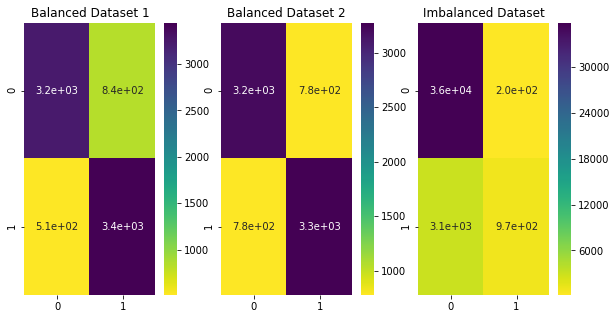

,accuracy,model,parameter search time,parameters,ratio,test auc score,training auc score
0,0.832,Balanced Data 1,0:37:52.848000,"{'colsample_bytree': 0.6000000000000001, 'gamm...",1.0:1 (20098/20098),0.918,1.000
1,0.805,Balanced Data 2,1:00:21.995000,"{'colsample_bytree': 0.6000000000000001, 'gamm...",1.0:1 (20098/20098),0.885,1.000
2,0.917,Imbalanced Data,3:32:33.131000,"{'colsample_bytree': 0.9, 'gamma': 0.8, 'learn...",8.95:1 (179902/20098),0.889,0.916


In [79]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
sns.heatmap(balanced_confusion, annot=True, cmap= 'viridis_r', ax=ax[0])
sns.heatmap(balanced_confusion_2, annot=True, cmap= 'viridis_r', ax=ax[1])
sns.heatmap(imbalanced_confusion, annot=True, cmap= 'viridis_r', ax=ax[2])
ax[0].set_title('Balanced Dataset 1')
ax[1].set_title('Balanced Dataset 2')
ax[2].set_title('Imbalanced Dataset')
plt.show()
final_results = pd.DataFrame([balanced_results, balanced_results_2, imbalanced_results])
display(final_results)